<a href="https://colab.research.google.com/github/irfanifebriyanti/latihan/blob/main/TRIALL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


load the dataset

In [ ]:
train_segar = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Segar'
train_busuk = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Busuk'
test_segar = '/content/drive/MyDrive/dataset-segarin/Kubis/Test/Segar'
test_busuk = '/content/drive/MyDrive/dataset-segarin/Kubis/Test/Busuk'

In [ ]:
import os
train_segar_names = os.listdir(train_segar)
train_busuk_names = os.listdir(train_busuk)
test_segar_names = os.listdir(test_segar)
test_busuk_names = os.listdir(test_busuk)

In [ ]:
print(len(train_segar_names))
print(len(train_busuk_names))
print(len(test_segar_names))
print(len(test_busuk_names))

90
87
20
21


Model building

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=2, activation='sigmoid')(x)

#Final model
model = Model(base_model.input, x)
model.compile(optimizer= 'adam', loss = tensorflow.keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:

#preprocessing
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset-segarin/Kubis/Training ', target_size=(256,256), 
                                               batch_size=32)

Found 177 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Busuk': 0, 'Segar': 1}

In [ ]:
#visualizing the data
t_img, label = train_data.next()
t_img

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


array([[[[0.44581553, 0.6942135 , 0.37503564],
         [0.4440955 , 0.69163346, 0.37847573],
         [0.44237548, 0.68905336, 0.3800113 ],
         ...,
         [0.23488674, 0.15636483, 0.16425323],
         [0.19627334, 0.10999883, 0.12176353],
         [0.18546906, 0.09742176, 0.10475446]],

        [[0.45593786, 0.7085708 , 0.36140093],
         [0.4533578 , 0.7051307 , 0.36312097],
         [0.4508453 , 0.70175815, 0.3649761 ],
         ...,
         [0.22731027, 0.1471047 , 0.15583493],
         [0.1895387 , 0.10326419, 0.1150289 ],
         [0.20146382, 0.11173286, 0.11485641]],

        [[0.46274513, 0.7196129 , 0.34703362],
         [0.46274513, 0.7187529 , 0.3513337 ],
         [0.46274513, 0.71789294, 0.35563377],
         ...,
         [0.2197338 , 0.13784458, 0.14741664],
         [0.18280408, 0.09652956, 0.10829426],
         [0.21745858, 0.12604395, 0.12495836]],

        ...,

        [[0.64049023, 0.7076891 , 0.6567087 ],
         [0.6243707 , 0.73041385, 0.67361915]

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
  for idx , img in enumerate(img_arr):
    if idx <= 10 :
      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

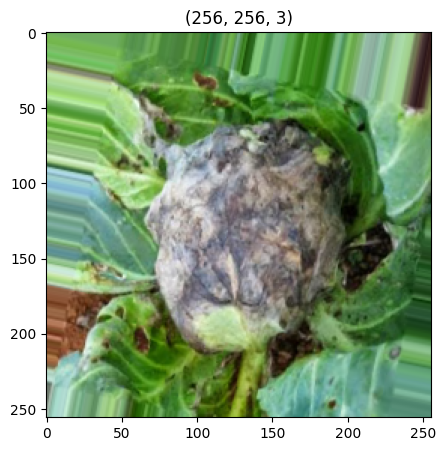

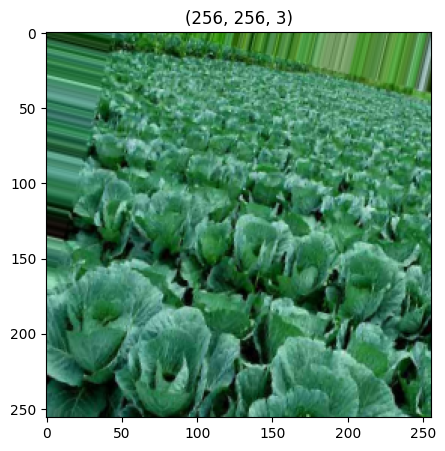

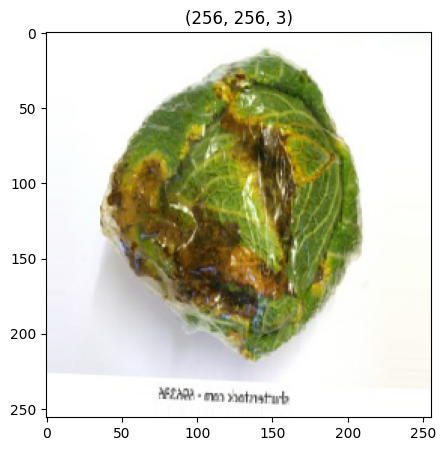

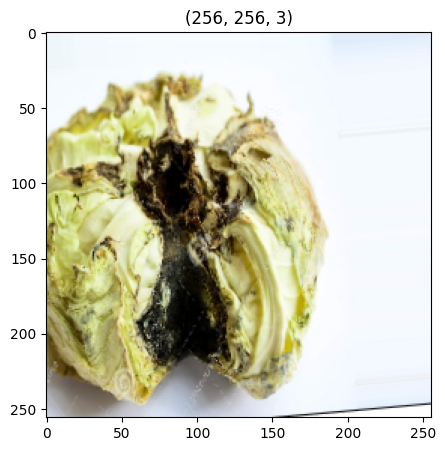

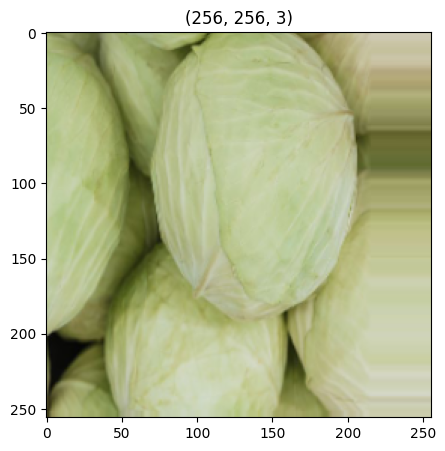

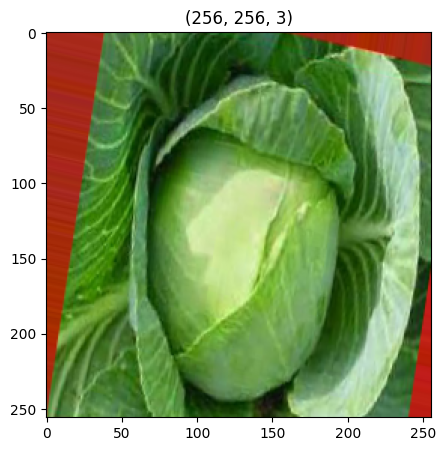

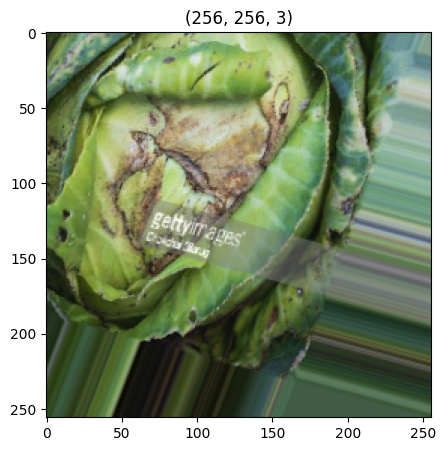

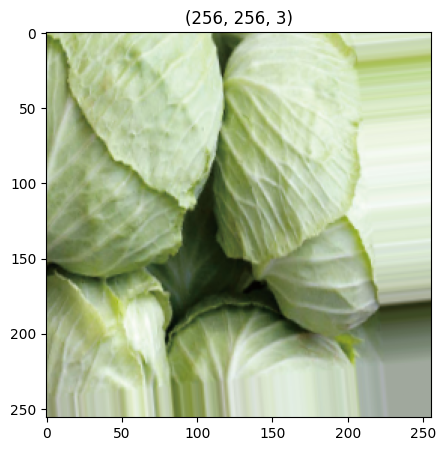

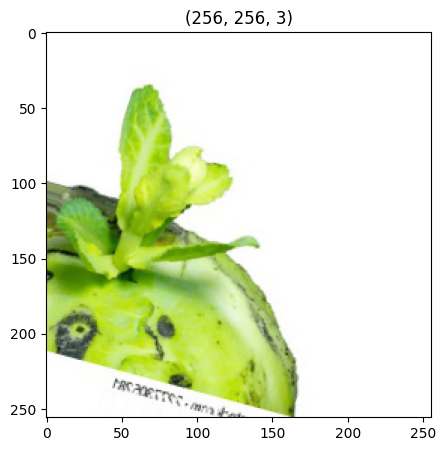

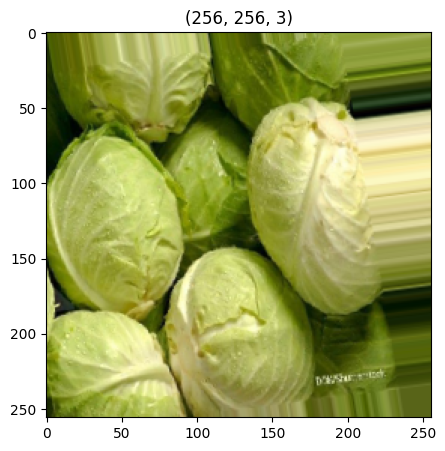

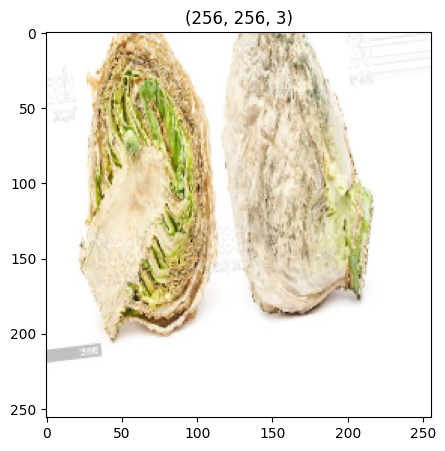

In [ ]:
plotImages(t_img , label)

Model Check Point

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
mc = ModelCheckpoint(filepath= "./trial2segarimodel.h5" , 
                     monitor= "accuracy", 
                     verbose= 1, 
                     save_best_only= True)
es = EarlyStopping(monitor= "accuracy",
                   min_delta= 0.01,
                   patience=5,
                   verbose= 1)
cb = [mc,es]
his = model.fit_generator(train_data,
                         steps_per_epoch= 5,
                         epochs=20,
                         callbacks= cb)

<ipython-input-19-424a2d310946>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 4.4958 - accuracy: 0.5793
Epoch 1: accuracy improved from -inf to 0.57931, saving model to ./trial2segarimodel.h5
5/5 [==============================] - 43s 8s/step - loss: 4.4958 - accuracy: 0.5793
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 2.3012 - accuracy: 0.6690
Epoch 2: accuracy improved from 0.57931 to 0.66897, saving model to ./trial2segarimodel.h5
5/5 [==============================] - 31s 5s/step - loss: 2.3012 - accuracy: 0.6690
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 1.1305 - accuracy: 0.8414
Epoch 3: accuracy improved from 0.66897 to 0.84138, saving model to ./trial2segarimodel.h5
5/5 [==============================] - 31s 6s/step - loss: 1.1305 - accuracy: 0.8414
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.8406 - accuracy: 0.8552
Epoch 4: accuracy improved from 0.84138 to 0.85517, saving model to ./trial2segarimodel.h5
5/5 [===========

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/trial2segarimodel.h5')


In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'loss vs acc')

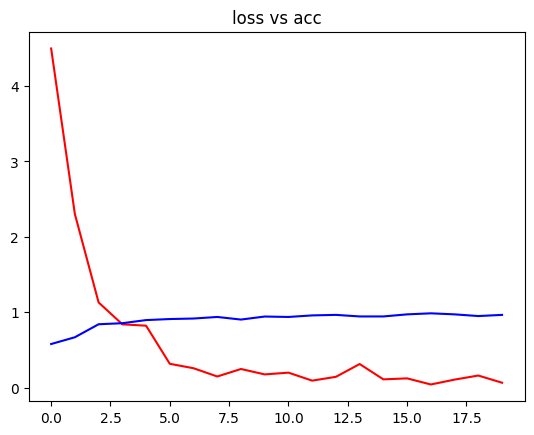

In [ ]:
plt.plot(h['loss'], c = 'red')
plt.plot(h['accuracy'], c = 'blue')
plt.title('loss vs acc')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 346ms/step


ini adalah sayur segar


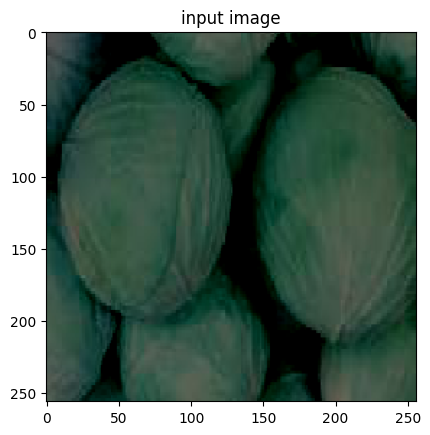

In [ ]:
path = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Segar/kubis-kol (1).jpeg'
path = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Segar/kohl-1756550_960_720.jpeg'
path = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Busuk/rotten-cabbage-isolated.jpeg'
path = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Busuk/wr2939204.jpeg'
path = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Segar/Kol_Putih_pcs.png'
path = '/content/drive/MyDrive/dataset-segarin/Kubis/Training /Busuk/tunas-meletus-dari-kepala-kubis-konsep-kehidupan-baru-kubis-busuk-dengan-pucuk-sayuran-busuk (1).jpeg'
path = '/content/drive/MyDrive/SEGARIN PROJECT/download (3).jpg'
path = '/content/drive/MyDrive/SEGARIN PROJECT/download (4).jpg'


img = load_img(path, target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("ini adalah sayur busuk")
else:
  print("ini adalah sayur segar")

input_arr = input_arr / 255.0

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = (False)
plt.show()

In [ ]:
model.save('model_segarin2.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
model = load_model('/content/model_segarin2.h5')

1/1 [==============================] - 0s 184ms/step


ini adalah sayur segar


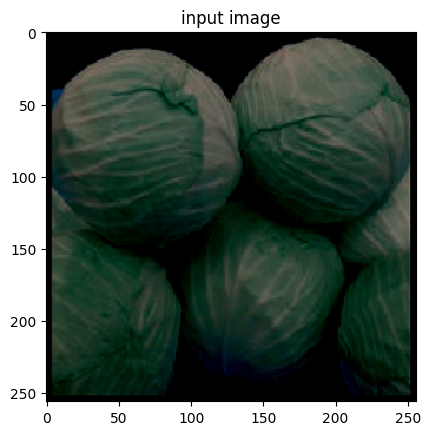

In [ ]:
path = '/content/drive/MyDrive/SEGARIN PROJECT/download (2).jpg'
path = "/content/drive/MyDrive/SEGARIN PROJECT/imageskubis tesss.jpg"
path ='/content/drive/MyDrive/SEGARIN PROJECT/Dataset/Test/Segar/HAMA-PENYAKIT-CABAI.jpeg'
path = '/content/drive/MyDrive/SEGARIN PROJECT/Dataset/Test/Segar/aHR0cHM6Ly9pbWFnZXMudG9rb3BlZGlhLm5ldC9pbWcvY2FjaGUvMjAwLXNxdWFyZS9WcWJjbU0vMjAyMi81LzgvYTQ4YjVmMWMtMjgxMi00MGM3LTk2ZWQtYTk1MzU2YTI2Nzc4LmpwZw==.png'

img = load_img(path, target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("ini adalah sayur busuk")
else:
  print("ini adalah sayur segar")

input_arr = input_arr / 255.0

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = (False)
plt.show()